In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sales_data = pd.read_csv('ALL SALESA DATA Book1.csv')

In [3]:
df = sales_data.copy() # copy the sales_data to df

In [4]:
df.head(5)

,Source.Name,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,Sales_April_2019.csv,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,Sales_April_2019.csv,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,Sales_April_2019.csv,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,Sales_April_2019.csv,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,Sales_April_2019.csv,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [5]:
df.drop(['Source.Name'] , axis = 1 , inplace = True) #droping the column Source Name
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [6]:
df.columns = df.columns.str.lower()               #converting all columns name to lower letter
df.columns = df.columns.str.replace(' ' , '_')    #replacing spaces in heading with _ 
df.columns

Index(['order_id', 'product', 'quantity_ordered', 'price_each', 'order_date',
       'purchase_address'],
      dtype='object')

In [7]:
df.dtypes   #checking date types

order_id              int64
product              object
quantity_ordered      int64
price_each          float64
order_date           object
purchase_address     object
dtype: object

In [8]:
df.isna().sum() #checking for null values

order_id            0
product             0
quantity_ordered    0
price_each          0
order_date          0
purchase_address    0
dtype: int64

In [9]:
df[df.duplicated()] #checking columns which contains duplicated rows
df.drop_duplicates(inplace = True) # droping the duplicated columns
df = df.reset_index(drop = True)

In [10]:
df['order_date'] = pd.to_datetime(df['order_date'] , format = '%m/%d/%y %H:%M') #converting order date column to date types
df.dtypes

order_id                     int64
product                     object
quantity_ordered             int64
price_each                 float64
order_date          datetime64[ns]
purchase_address            object
dtype: object

In [11]:
def city(address):
    '''
    Fuction extract city from the address 
    args:
        address (object | str) 
    returns:
        city
    '''
    city_name = address.split(',')[1]
    return city_name
def state(address):
    '''
    Fuction extract state from the address 
    args:
        address (object | str) 
    returns:
        state
    '''
    state_name = address.split(',')[2].split(' ')[1]
    return state_name


In [12]:
df['purchase_city'] = df['purchase_address'].apply(lambda x : f'{city(x)} ({state(x)})') #creating city column 
df.drop(['purchase_address'] , axis = 1 , inplace = True) #droping purchase address column
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,Boston (MA)
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,Los Angeles (CA)


In [13]:
df['month'] = df['order_date'].dt.strftime('%b').str.lower() #extracting month from the order date column and casting to lower case
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_city,month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,Dallas (TX),apr
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,Boston (MA),apr
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,Los Angeles (CA),apr
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,Los Angeles (CA),apr
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,Los Angeles (CA),apr


In [14]:
df['sales'] = df['quantity_ordered'] * df['price_each'] #creating sales column by multiplying quantity ordered column with price each column

In [15]:
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_city,month,sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,Dallas (TX),apr,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,Boston (MA),apr,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,Los Angeles (CA),apr,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,Los Angeles (CA),apr,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,Los Angeles (CA),apr,11.99


In [16]:
df = df[['order_id' ,'order_date','month' , 'product' , 
         'quantity_ordered' , 'price_each' , 'sales' , 
         'purchase_city']] #rearranging the column 

In [17]:
df.head()

,order_id,order_date,month,product,quantity_ordered,price_each,sales,purchase_city
0,176558,2019-04-19 08:46:00,apr,USB-C Charging Cable,2,11.95,23.90,Dallas (TX)
1,176559,2019-04-07 22:30:00,apr,Bose SoundSport Headphones,1,99.99,99.99,Boston (MA)
2,176560,2019-04-12 14:38:00,apr,Google Phone,1,600.00,600.00,Los Angeles (CA)
3,176560,2019-04-12 14:38:00,apr,Wired Headphones,1,11.99,11.99,Los Angeles (CA)
4,176561,2019-04-30 09:27:00,apr,Wired Headphones,1,11.99,11.99,Los Angeles (CA)


# WHAT IS THE BEST MONTHS FOR SALES

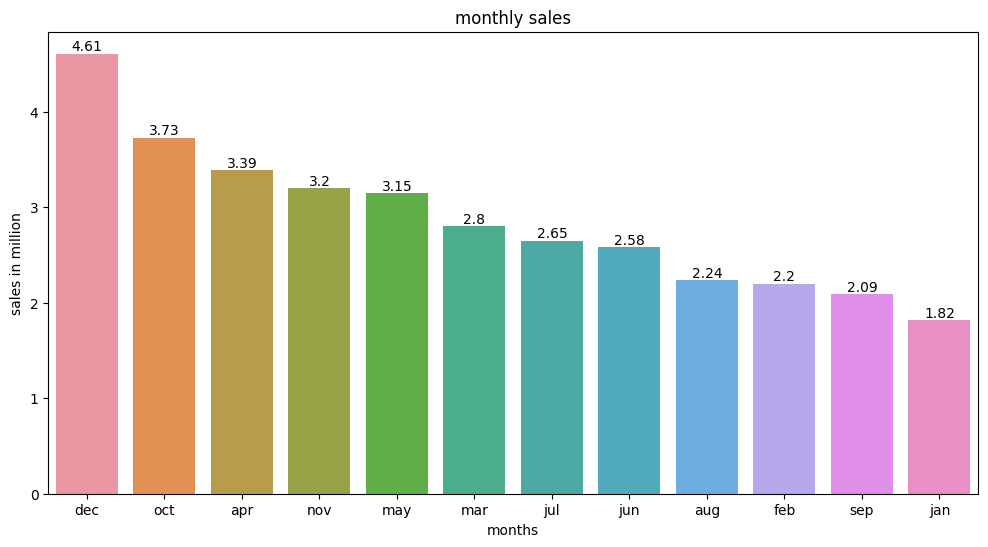

In [18]:
plt.figure(figsize = (12,6))

data = df.groupby(['month'])['sales'].sum().reset_index().sort_values( by = 'sales' , ascending = False) #grouping the date into months

data['sales'] = round(data['sales']/1000000,2) #converting sales column into millions

ax = sns.barplot(data =  data,  x = 'month' , y = 'sales') #creating barplot with x as month and y as sales
ax.bar_label(ax.containers[0]) #labeling the bar 

plt.xlabel('months')
plt.ylabel('sales in million')
plt.title('monthly sales')

plt.show()

# WHICH CITY HAS A HIGHEST SALES

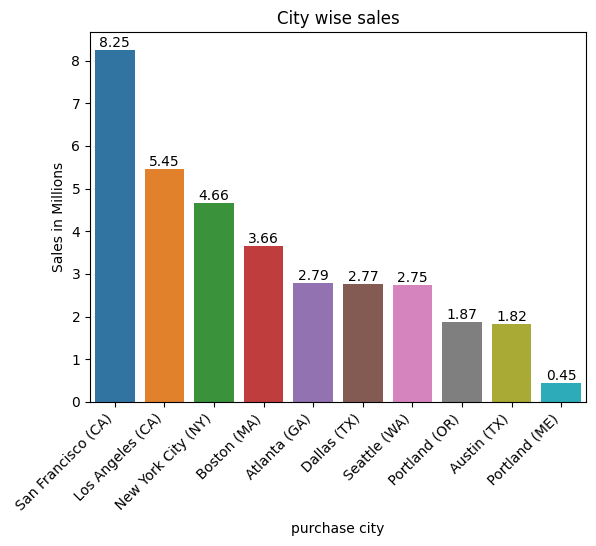

In [19]:
data = df.groupby('purchase_city')['sales'].sum().reset_index().sort_values(by = 'sales' , ascending = False)

data['sales'] = round(data['sales'] / 1000000,2) #converting the sales into millions

ax = sns.barplot(data = data , x = 'purchase_city' , y = 'sales')

ax.bar_label(ax.containers[0]) #labeling the bar with sales values
plt.xlabel('purchase city') 
plt.ylabel('Sales in Millions')
plt.title('City wise sales')
plt.xticks(rotation = 45 ,horizontalalignment='right') #rotating x ticks 45 degree
plt.show()

# BEST HOUR FOR SALES

In [20]:
df['hour'] = df['order_date'].dt.hour #creating hour column

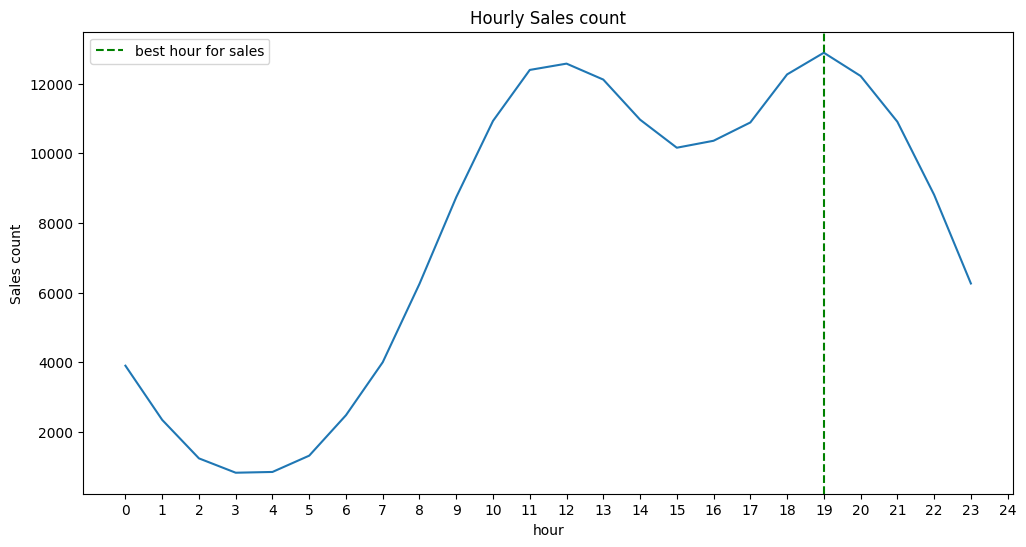

In [29]:
data = df.groupby('hour')['sales'].count().reset_index()

best_hours = data[data['sales'] == data['sales'].max()].reset_index()['hour'][0] #calculating the max sales in hour

plt.figure(figsize = (12,6))
sns.lineplot(data = data , x = 'hour' , y = 'sales')
plt.axvline(best_hours, linestyle = '--' , color = 'g' , label = 'best hour for sales') #ploting max sales (hour)
plt.xticks(range(0,25,1))
plt.ylabel('Sales count')
plt.title('Hourly Sales count')
plt.legend()
plt.show()

In [22]:
df.head()

,order_id,order_date,month,product,quantity_ordered,price_each,sales,purchase_city,hour
0,176558,2019-04-19 08:46:00,apr,USB-C Charging Cable,2,11.95,23.90,Dallas (TX),8
1,176559,2019-04-07 22:30:00,apr,Bose SoundSport Headphones,1,99.99,99.99,Boston (MA),22
2,176560,2019-04-12 14:38:00,apr,Google Phone,1,600.00,600.00,Los Angeles (CA),14
3,176560,2019-04-12 14:38:00,apr,Wired Headphones,1,11.99,11.99,Los Angeles (CA),14
4,176561,2019-04-30 09:27:00,apr,Wired Headphones,1,11.99,11.99,Los Angeles (CA),9


# WHICH TWO PRODUCTS SOLD MOST OFTEN

In [23]:
from itertools import combinations
from collections import Counter
count = Counter()
data = df.copy()
data = data.groupby("order_id")["product"].apply(lambda x: ','.join(x)).reset_index().drop_duplicates() #grouping data by order id and joing all product in same id

for product in data['product']:
    product = product.split(',')
    count.update(Counter(combinations(product,2)))
    
for key , value in count.most_common(10): 

    print(key , value)


('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


# WHAT PRODUCT SOLD THE MOST AND WHAT IS THE PRICE OF THE PRODUCT

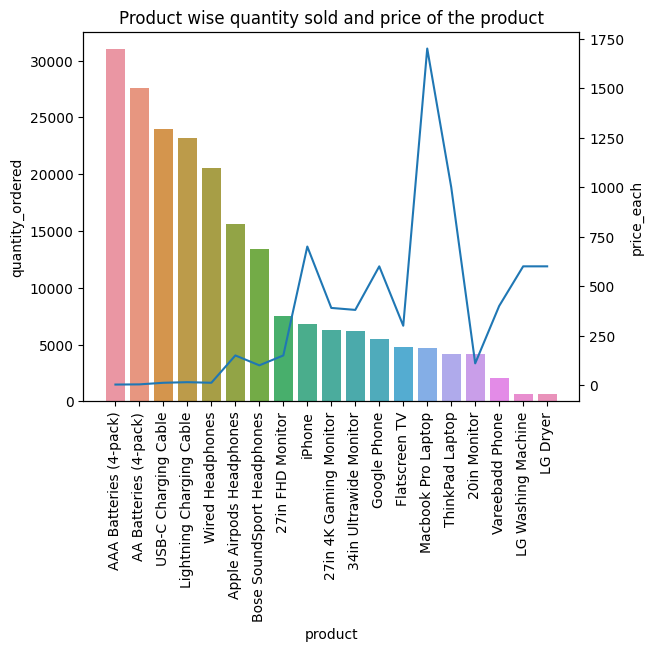

In [31]:
data = df.groupby(['product'])[['quantity_ordered' , 'price_each']].agg({ 'quantity_ordered' : 'sum',
                                                                        'price_each' : 'mean'}).reset_index().sort_values(by = 'quantity_ordered' , ascending = False)
fig , ax1  = plt.subplots()
ax2 = ax1.twinx()
sns.barplot(data = data , x = 'product' , y = 'quantity_ordered' , ax = ax1)
sns.lineplot(data = data , x = 'product' , y = 'price_each' , ax = ax2)

ax1.set_xticklabels(data['product'], rotation=90)  # Rotate x-axis labels
plt.title('Product wise quantity sold and price of the product')
plt.show()

# COMPARE WEEK DAYS VS WEEK END

In [25]:
def weekday_ends (day):
    '''
    function return week day or week end based on the day 
    args:
        day (str)
    '''
    if day == 'sat' or day == 'sun':
        return 'weekend'
    else:
        return 'weekday'

In [26]:
df['weekend_day'] = df['order_date'].dt.strftime('%a').str.lower().apply(weekday_ends)

In [27]:
df.head()

,order_id,order_date,month,product,quantity_ordered,price_each,sales,purchase_city,hour,weekend_day
0,176558,2019-04-19 08:46:00,apr,USB-C Charging Cable,2,11.95,23.90,Dallas (TX),8,weekday
1,176559,2019-04-07 22:30:00,apr,Bose SoundSport Headphones,1,99.99,99.99,Boston (MA),22,weekend
2,176560,2019-04-12 14:38:00,apr,Google Phone,1,600.00,600.00,Los Angeles (CA),14,weekday
3,176560,2019-04-12 14:38:00,apr,Wired Headphones,1,11.99,11.99,Los Angeles (CA),14,weekday
4,176561,2019-04-30 09:27:00,apr,Wired Headphones,1,11.99,11.99,Los Angeles (CA),9,weekday


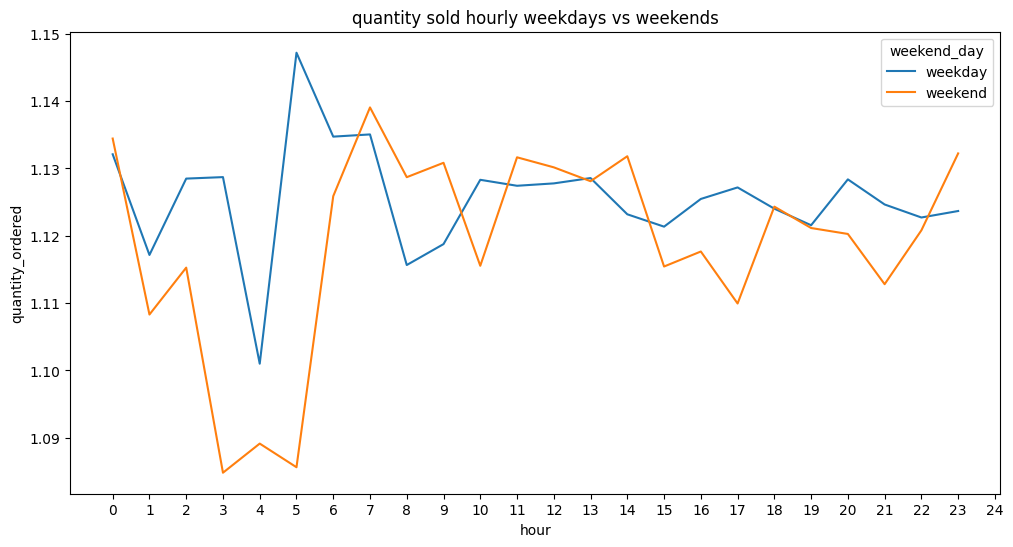

In [32]:
#grouping the data based on weekdays and weekend and aggregating the avg quantity sold per hour
data = df.groupby(['hour' , 'weekend_day'])['quantity_ordered'].mean().reset_index()
plt.figure(figsize = (12,6))
sns.lineplot(data = data , x = 'hour' , y = 'quantity_ordered' , hue = 'weekend_day')
plt.xticks(range(0,25,1))
plt.title("quantity sold hourly weekdays vs weekends")
plt.show()